In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Creación nuevos .csv con filtros para modelos ML 

### 1. Datos con precios no superiores a 100 (modelos regresión)
.csv creado -> tickets_filtrados_100.csv

In [11]:
link_data = "https://docs.google.com/spreadsheets/d/1QvsVM0K2YZWGuFNoKJzaZrRFsvCtmYbMCTvf3twFCgY/export?format=csv"
tickets = pd.read_csv(link_data)
tickets.head()

,event_url,title,datetime_local,city,state,country,postal_code,ticket_id,ticket_price,total_price,quantity,event_category
0,https://feverup.com/m/100120,Top Stand-Up Comedy in Covent Garden,2023-10-27 20:30:00,London,England,GB,WC2H 9LA,36853293,16.0,16.0,50,THEATER
1,https://feverup.com/m/100120,Top Stand-Up Comedy in Covent Garden,2023-10-27 20:30:00,London,England,GB,WC2H 9LA,36853261,20.0,20.0,50,THEATER
2,https://feverup.com/m/100120,Top Stand-Up Comedy in Covent Garden,2023-10-20 20:30:00,London,England,GB,WC2H 9LA,36853292,16.0,16.0,50,THEATER
3,https://feverup.com/m/100120,Top Stand-Up Comedy in Covent Garden,2023-10-20 20:30:00,London,England,GB,WC2H 9LA,36853259,20.0,20.0,50,THEATER
4,https://feverup.com/m/100120,Top Stand-Up Comedy in Covent Garden,2023-10-21 20:30:00,London,England,GB,WC2H 9LA,36853324,17.0,17.0,50,THEATER


In [12]:
# Copia del df con 'ticket_price' no mayor de 100
tickets_copy_100 = tickets[tickets['ticket_price'] <= 100].copy()
tickets_copy_100.shape

(1636, 12)

In [13]:
# Guardar el DataFrame como un archivo CSV
#tickets_copy_100.to_csv('tickets_filtrados_100.csv', index=False)

### 2. Datos con variables codificadas y de mayor correlación (modelos clasificación)
.csv creado -> tickets_ML_clasificacion.csv

#### Dos nuevas columnas de precios (categórica y discreta)

In [14]:
link_data = "https://docs.google.com/spreadsheets/d/1QvsVM0K2YZWGuFNoKJzaZrRFsvCtmYbMCTvf3twFCgY/export?format=csv"
tickets = pd.read_csv(link_data)

In [15]:
# NUEVAS COLUMNAS 'price_category' y 'price_level'

# Definir los rangos y las etiquetas para las categorías de la nueva columna
rangos = [0, 20, 50, 100, 200, 300]
etiquetas = ['very_low_price', 'low_price', 'middle_price', 'middle_high_price', 'high_price']

# Crear las columnas nuevas 'price_category' y 'price_level'
tickets['price_category'] = pd.cut(tickets['ticket_price'], bins=rangos, labels=etiquetas, right=False)     # 'price_category' usando pd.cut()
tickets['price_level'] = tickets['price_category'].map({'very_low_price':1, 'low_price': 2, 'middle_price': 3, 'middle_high_price': 4, 'high_price': 5})   # 'price_level' con .map -> mapear las categorías a números del 1 al 5

print(tickets.head())

                      event_url                                 title  \
0  https://feverup.com/m/100120  Top Stand-Up Comedy in Covent Garden   
1  https://feverup.com/m/100120  Top Stand-Up Comedy in Covent Garden   
2  https://feverup.com/m/100120  Top Stand-Up Comedy in Covent Garden   
3  https://feverup.com/m/100120  Top Stand-Up Comedy in Covent Garden   
4  https://feverup.com/m/100120  Top Stand-Up Comedy in Covent Garden   

        datetime_local    city    state country postal_code  ticket_id  \
0  2023-10-27 20:30:00  London  England      GB    WC2H 9LA   36853293   
1  2023-10-27 20:30:00  London  England      GB    WC2H 9LA   36853261   
2  2023-10-20 20:30:00  London  England      GB    WC2H 9LA   36853292   
3  2023-10-20 20:30:00  London  England      GB    WC2H 9LA   36853259   
4  2023-10-21 20:30:00  London  England      GB    WC2H 9LA   36853324   

   ticket_price  total_price  quantity event_category  price_category  \
0          16.0         16.0        50     

In [16]:
# Ver reparto de datos con los nuevos niveles de precios
tickets['price_level'].value_counts()

1    1041
4     523
5     496
2     307
3     288
Name: price_level, dtype: int64

#### Nueva columna con día de la semana (1-7, lunes-domingo)

In [17]:
tickets['datetime_local'] = pd.to_datetime(tickets['datetime_local'])       # Convertir la columna 'datetime_local' a tipo datetime
tickets['day'] = tickets['datetime_local'].dt.weekday + 1                   # Extraer el día de la semana y sumar 1 para ajustar los valores a 1-7

tickets['day'].value_counts()                                               # Comprobar el reparto de los datos

4    525
3    522
2    392
6    345
7    336
5    283
1    252
Name: day, dtype: int64

#### Nueva columna con numeración 1-4 (mañana, mediodía, tarde, noche)

In [18]:
# Definir las condiciones para cada rango horario
conditions = [
    (tickets['datetime_local'].dt.hour < 12),                                               # Mañana (< 12:00)
    (tickets['datetime_local'].dt.hour >= 12) & (tickets['datetime_local'].dt.hour < 15),   # Mediodía (12:00 - 15:00)
    (tickets['datetime_local'].dt.hour >= 15) & (tickets['datetime_local'].dt.hour < 19),   # Tarde (15:00 - 19:00)
    (tickets['datetime_local'].dt.hour >= 19)                                               # Noche (> 19:00)
]

# Asignar un número a cada rango horario
values = [1, 2, 3, 4]

# Crear la nueva columna 'time_of_day' utilizando np.select() para aplicar las condiciones
tickets['event_time'] = np.select(conditions, values)

tickets['event_time'].value_counts()    

3    1010
2     808
4     632
1     205
Name: event_time, dtype: int64

#### Codificar columnas de categorías para seleccionar las de mayor correlación

In [19]:
# Aplicar codificación one-hot a la columna 'event_category'
encoded_categories = pd.get_dummies(tickets['event_category'], prefix='category')

# Concatenar las columnas codificadas con el DataFrame original
tickets = pd.concat([tickets, encoded_categories], axis=1)

In [20]:
tickets['price_level'] = tickets['price_level'].astype(int) 

In [21]:
correlation = tickets[['price_level', 'day', 'quantity', 'event_time', 'category_MIX', 'category_TASTING', 'category_THEATER', 'category_WELLNESS', 'category_CONCERT', 'category_IGHTLIF']].corr()
correlation

,price_level,day,quantity,event_time,category_MIX,category_TASTING,category_THEATER,category_WELLNESS,category_CONCERT,category_IGHTLIF
price_level,1.000000,0.380090,-0.504342,0.073392,0.901899,-0.121348,-0.078888,-0.013308,-0.041847,-0.816036
day,0.380090,1.000000,0.191394,-0.151019,0.259281,0.384017,0.108525,0.136077,0.096467,-0.556513
quantity,-0.504342,0.191394,1.000000,-0.053572,-0.679805,0.578428,0.323765,0.102000,0.384554,0.172468
event_time,0.073392,-0.151019,-0.053572,1.000000,0.088404,-0.231155,0.164202,-0.245649,0.124199,0.024726
category_MIX,0.901899,0.259281,-0.679805,0.088404,1.000000,-0.270991,-0.112889,-0.115866,-0.121614,-0.780015
category_TASTING,-0.121348,0.384017,0.578428,-0.231155,-0.270991,1.000000,-0.034857,-0.035776,-0.037551,-0.240844
category_THEATER,-0.078888,0.108525,0.323765,0.164202,-0.112889,-0.034857,1.000000,-0.014903,-0.015643,-0.100330
category_WELLNESS,-0.013308,0.136077,0.102000,-0.245649,-0.115866,-0.035776,-0.014903,1.000000,-0.016055,-0.102976
category_CONCERT,-0.041847,0.096467,0.384554,0.124199,-0.121614,-0.037551,-0.015643,-0.016055,1.000000,-0.108085
category_IGHTLIF,-0.816036,-0.556513,0.172468,0.024726,-0.780015,-0.240844,-0.100330,-0.102976,-0.108085,1.000000


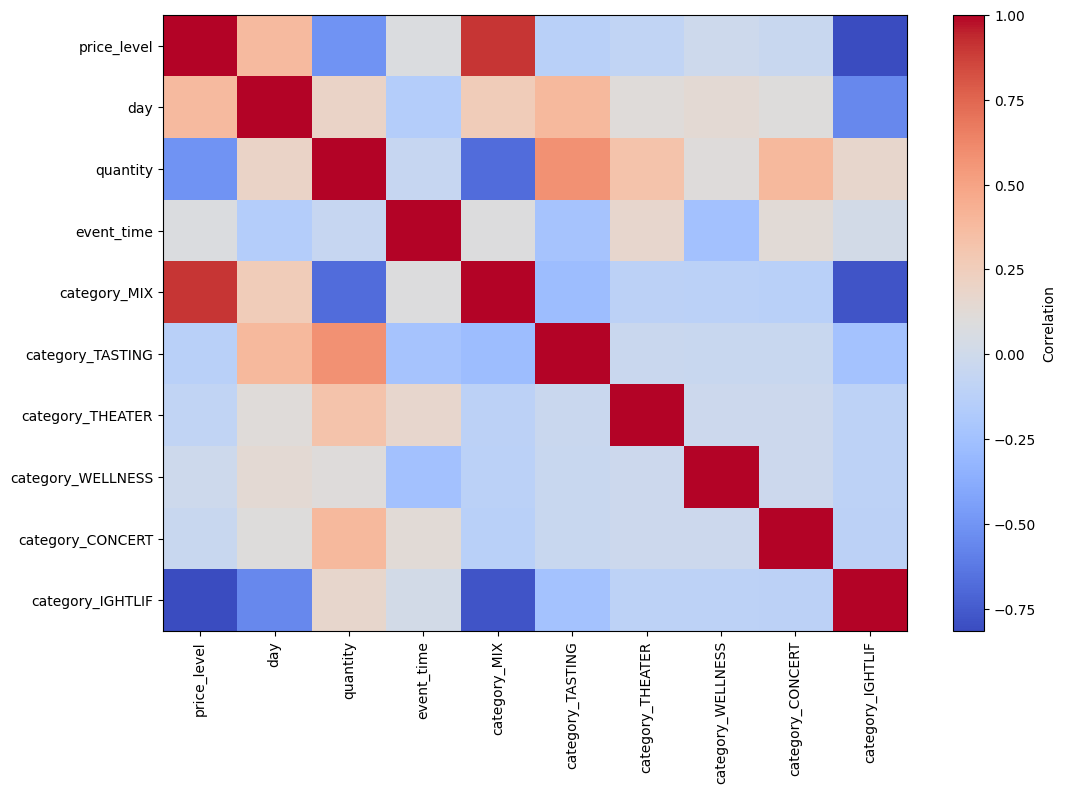

In [22]:
# Creación matriz correlación variables
plt.figure(figsize=(12, 8))
plt.imshow(correlation, cmap='coolwarm', aspect='auto')  # Visualizar matriz de correlación
plt.colorbar(label='Correlation')  # Añadir barra de color
plt.xticks(ticks=range(len(correlation)), labels=correlation.columns, rotation=90)  # Etiquetas en el eje x
plt.yticks(ticks=range(len(correlation)), labels=correlation.columns)  # Etiquetas en el eje y
plt.show()

La correlación más alta de price level es con 'category_MIX' y 'category_IGHTLIF'.

La magnitud de -0.82 indica una fuerte relación inversa, lo que sugiere que a medida que el precio aumenta, la probabilidad de que el evento pertenezca a la categoría 'IGHTLIF' (vida nocturna) disminuye significativamente.

La magnitud de 0.90 indica una fuerte relación directa, lo que sugiere que a medida que el precio aumenta, la probabilidad de que el evento pertenezca a la categoría 'MIX' también aumenta significativamente.

Dados los resultados, utilizaré para modelos de clasificación: 
- 'price_level' como variable dependiente y objetivo.
- 'category_MIX', 'category_IGHTLIF', 'quantity', 'day'. 

In [23]:
# Guardar .csv con esas columnas
tickets_ML_clasificacion = tickets[['price_level', 'category_MIX', 'category_IGHTLIF', 'quantity', 'day']]
# tickets_ML_clasificacion.to_csv('tickets_modelos_ML_clasificacion.csv', index=False)